# Binary Symmetric Channel and Repetition Codes







# Binary Symmetric Channel



## 1. What is a Binary Symmetric Channel


The binary symmetric channel is a channel in which each bit has a probability f of being flipped. 

## 2. Coding the Binary Symmetric Channel

### 2.a Importing libraries

In [10]:
from PIL import Image                       # To open, crop and change images
import matplotlib.pyplot as plt             # To plot the image
import math                                 # To perform mathematical operations
import numpy as np                          # To create and manipulate arrays
from numpy import asarray                   # To convert an image to an numpy array

### 2.b Import an Image and transform it to a binary image

In [11]:
def convert_image(location):
    
    the_image = Image.open(location)
    the_image = the_image.convert("1")     # Converts to a binary image
    
    image_array = asarray(the_image)       # Converts image to an array
    image_array = image_array.astype(int)  # Converts the array to integers (1's and 0's) rather than boolean values
    
    return image_array

In [12]:
location =r"C:\Users\preet\Desktop\image_six.jpg"
array = convert_image(location)

In [13]:
def print_array_image(array):
    plt.imshow(array,cmap = 'gray')
    plt.show()
    

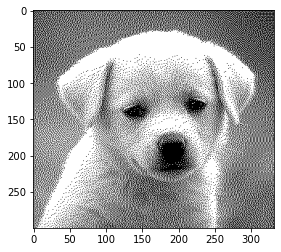

In [14]:
print_array_image(array)

## 2.c Create the noise channel

In [15]:
def binary_symmetric_channel(prob_of_switch, array):
    prob = np.array([1-prob_of_switch,prob_of_switch])
    
    new_array = np.copy(array)
    z_h, z_w = new_array.shape
    
    for h in range(z_h):
        for w in range(z_w):
            noise = np.random.choice(prob,p=prob)
            
            if noise == prob_of_switch:
                new_array[h][w] = (new_array[h][w]+1)%2
    return new_array


In [16]:
new_array = binary_symmetric_channel(0.1,array)

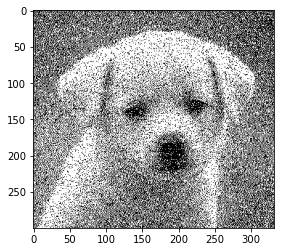

In [17]:
print_array_image(new_array)

In [18]:
def difference_in_arrays(array,new_array):
    zero_to_one = np.greater(new_array, array)
    one_to_zero = np.greater(array,new_array)
    
    changes = zero_to_one.sum() + one_to_zero.sum()
    
    print("The number of flipped pixels are: ",changes)
    
    shape_of_array = array.shape
    total_pixels = shape_of_array[0] * shape_of_array[1]
    
    print("The number of total pixels are: ",total_pixels)
    
    prob_of_changes = changes/total_pixels
    
    print("The probabilty the bit was flipped in: ", prob_of_changes)
    
    return prob_of_changes
    
    
    
    

In [19]:
x = difference_in_arrays(array, new_array)

The number of flipped pixels are:  10132
The number of total pixels are:  99600
The probabilty the bit was flipped in:  0.10172690763052208


## 2. Error Correcting Code for Binary Symmetric Channel : Repitition codes

In [20]:
def repetition_encoding(array, number):
    n_H, n_W = array.shape
    
    encoded_array = np.zeros((n_H*number,n_W))

    
    for w in range(n_W):
        for h in range(n_H):
            pixel = array[h][w]
            
            for num in range(number):
                encoded_array[h+num*n_H][w] = pixel
    return encoded_array


    

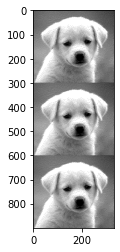

In [21]:
x = repetition_encoding(array,3)
print_array_image(x)

In [22]:
y = binary_symmetric_channel(0.1, x)

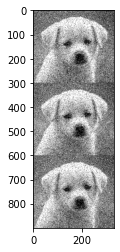

In [23]:
print_array_image(y)

In [24]:
print(y[3][2])

1.0


In [60]:
def decoding_repetition(array,num):
    n_H, n_W = array.shape
    print(n_H, n_W)
    decoded_matrix = np.zeros((int(n_H/3),int(n_W)))
    
    for w in range(int(n_W)):
        for h in range(int(n_H/3)):
            pixels = []
            for n in range(num):
                pixel = array[h+n*int(n_H/3)][w]
                pixels.append(pixel)
                
            if int(sum(pixels)) == 0:
                decoded_matrix[h][w] = 0
            elif int(sum(pixels)) == 1:
                decoded_matrix[h][w] = 0
            elif int(sum(pixels)) == 2:
                decoded_matrix[h][w] = 1
            elif int(sum(pixels)) == 3:
                decoded_matrix[h][w] = 1
                
    return decoded_matrix
    

In [61]:
j = decoding_repetition(y,3)
print(j)

900 332
[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 1. 0.]]


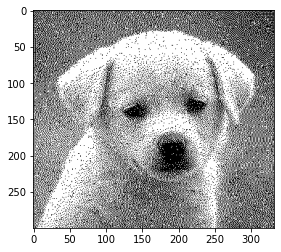

In [63]:



new  = Image.fromarray(j)
jello = plt.imshow(new)
plt.show()

In [64]:
difference_in_arrays(array,j)

The number of flipped pixels are:  2793
The number of total pixels are:  99600
The probabilty the bit was flipped in:  0.028042168674698796


0.028042168674698796